# Linear Regression

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Dataframe содержит информацию о поездках в такси. Целевая переменная -- total_amount

#### Для начала посмотрим на данные и сделаем некоторые преобразования

In [44]:
df = pd.read_csv('taxi_.csv')

In [45]:
df.shape

(1231965, 20)

In [46]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [47]:
df = df.drop('Unnamed: 0', axis = 1)

In [48]:
df.nunique()

VendorID                      2
tpep_pickup_datetime     741566
tpep_dropoff_datetime    742008
passenger_count              10
trip_distance              3801
RatecodeID                    7
store_and_fwd_flag            2
PULocationID                250
DOLocationID                260
payment_type                  5
fare_amount                1248
extra                        51
mta_tax                       6
tip_amount                 2547
tolls_amount                351
improvement_surcharge         3
total_amount               7725
congestion_surcharge          4
airport_fee                   3
dtype: int64

In [49]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [50]:
df['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

#### Преобразуем даты в нужный формат и сократим количество колонок

In [51]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [52]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [53]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [54]:
df['trip_duration'] = df['trip_duration'].dt.total_seconds()

In [55]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,1069.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,504.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,538.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,602.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,2252.0


In [56]:
df = df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis = 1)

#### Посмотрим на пропуски и заполним их средним или самым популярным значением

In [57]:
df.isna().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
trip_duration            0
dtype: int64

In [58]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

In [59]:
ps_avg = df['passenger_count'].mean()

In [60]:
df['passenger_count'] = df['passenger_count'].fillna(ps_avg)

In [61]:
df['RatecodeID'].mean()

1.3808736449493288

In [62]:
df.groupby('RatecodeID').size().sort_values()

RatecodeID
6.0          10
4.0        1653
3.0        2484
99.0       3969
5.0        7714
2.0       39428
1.0     1176707
dtype: int64

In [63]:
df['RatecodeID'] = df['RatecodeID'].fillna(1.0)

In [64]:
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0.0)

In [65]:
df['airport_fee'] = df['airport_fee'].fillna(0.0)

In [66]:
df.isna().sum()

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
trip_duration            0
dtype: int64

#### Посмотрим на корелляцию признаков

In [67]:
import seaborn as sns

In [68]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

<Axes: >

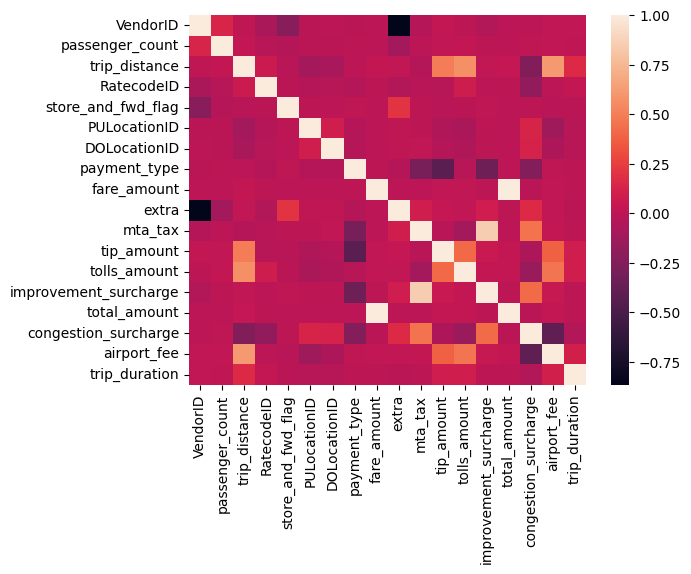

In [69]:
corr = df.corr()
sns.heatmap(corr)

#### Сильно скоррелированы чаевые и общая сумма. Не будем удалять столбец чаевые, так как он вносит большой вклад в таргет

#### Посмотрим на распределение таргета

In [70]:
Y = df['total_amount']

In [71]:
X = df.drop('total_amount', axis = 1)

<Axes: >

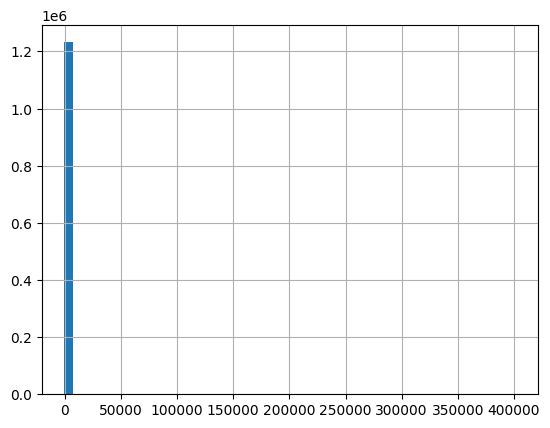

In [72]:
Y.hist(bins = 50)

#### Попробуем избавиться от выбросов, убрав по 0,3 % с каждой стороны распределения выборки

In [73]:
top995 = df['total_amount'].quantile(0.997)
top005 = df['total_amount'].quantile(0.003)
ta  = df[(df['total_amount'] > top005)&(df['total_amount'] < top995)]

In [74]:
df['total_amount'].mean()

19.395154513318165

In [75]:
df.shape

(1231965, 18)

In [76]:
ta['total_amount'].mean()

18.869909745434594

In [77]:
ta.shape

(1224204, 18)

<Axes: >

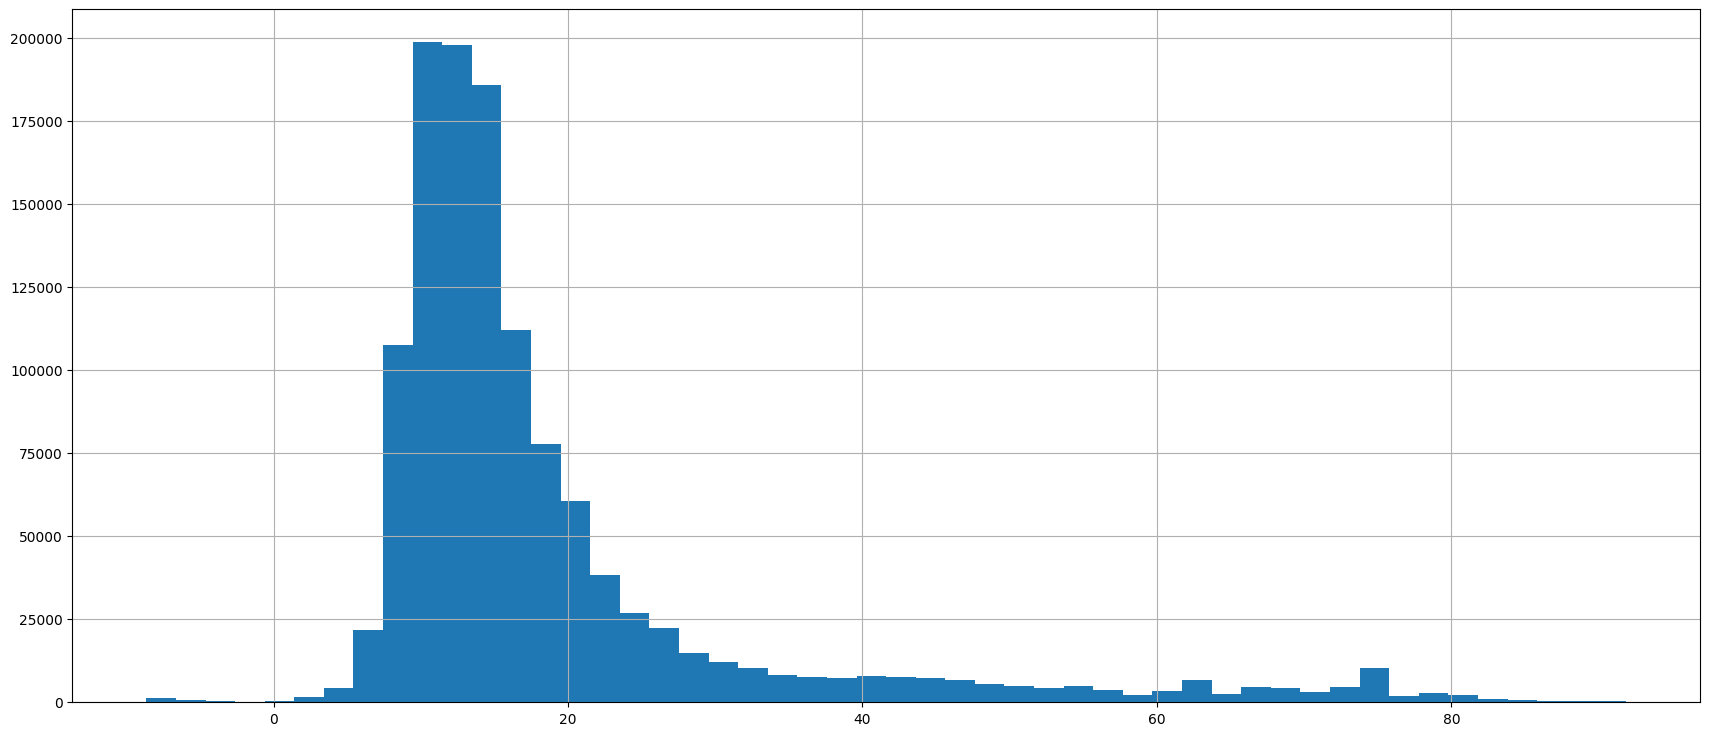

In [78]:
fig = plt.figure()
fig.set_size_inches(21, 9)
ta['total_amount'].hist(bins = 50)

#### Распределение стало иметь приличный вид

#### Построим модель линейной регрессии, применив нормировку данных

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, shuffle = True, random_state = 47)
pipe = Pipeline([('SS', StandardScaler()),
                 ('LR', LinearRegression())
                ])

In [80]:
pipe.fit(X_train, Y_train)
pred = pipe.predict(X_test)
print(np.mean(pred - Y_test)**2)

3.0425743081857094e-07


In [81]:
cv = cross_validate(LinearRegression(), X, Y, cv = 10)

In [82]:
cv['test_score'].mean()

0.9997845270230645

#### Качество на тесте и кроссвалидации получилось отличным. Можно сделать вывод, что таргет зависит линейно от признаков, особенно, от чаевых. Они, в свою очередь зависят от настроения и комфорта пассажиров, на что нужно обратить больше всего внимания

In [83]:
params = pipe.named_steps['LR'].coef_
cols = X.columns
taxi_params = pd.DataFrame([X.columns, pipe.named_steps['LR'].coef_])
taxi_params

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,trip_duration
1,0.816913,-0.000682,-0.000212,0.06388,0.001144,-0.001855,-0.000609,-0.000331,417.451577,0.924385,0.109273,2.87277,1.775049,0.115925,0.588089,0.253549,0.000698
